# Word2Vec

Neste código vamos treinar um modelo Word2Vec para fazer o embedding de palavras presentes em um [corpus de literatura em língua portuguesa](https://www.kaggle.com/rtatman/brazilian-portuguese-literature-corpus).

## Baixando os Dados

Começamos fazendo o download do corpus.

In [ ]:
# O comando abaixo baixa um arquivo disponível no Google Drive

!gdown https://drive.google.com/uc?id=1RmtZ6LUWTdDvVrBNzUIVziKlpfZV2veY

Downloading...
From: https://drive.google.com/uc?id=1RmtZ6LUWTdDvVrBNzUIVziKlpfZV2veY
To: /content/Brazilian_Portugese_Corpus.zip
100% 9.00M/9.00M [00:00<00:00, 59.9MB/s]


Em seguida fazemos a descompressão.

In [ ]:
# Esse comando faz a descompressão do arquivo "zipado"

!unzip Brazilian_Portugese_Corpus.zip

Archive:  Brazilian_Portugese_Corpus.zip
   creating: Brazilian_Portugese_Corpus/
  inflating: __MACOSX/._Brazilian_Portugese_Corpus  
  inflating: Brazilian_Portugese_Corpus/Memorias Postumas de Bras Cubas.txt  
  inflating: __MACOSX/Brazilian_Portugese_Corpus/._Memorias Postumas de Bras Cubas.txt  
  inflating: Brazilian_Portugese_Corpus/O Guarani.txt  
  inflating: __MACOSX/Brazilian_Portugese_Corpus/._O Guarani.txt  
  inflating: Brazilian_Portugese_Corpus/Demonios.txt  
  inflating: __MACOSX/Brazilian_Portugese_Corpus/._Demonios.txt  
  inflating: Brazilian_Portugese_Corpus/Memorial de Aires.txt  
  inflating: __MACOSX/Brazilian_Portugese_Corpus/._Memorial de Aires.txt  
  inflating: Brazilian_Portugese_Corpus/A Moreninha.txt  
  inflating: __MACOSX/Brazilian_Portugese_Corpus/._A Moreninha.txt  
  inflating: Brazilian_Portugese_Corpus/Mae.txt  
  inflating: __MACOSX/Brazilian_Portugese_Corpus/._Mae.txt  
  inflating: Brazilian_Portugese_Corpus/Historias da Meia-Noite.txt  
  infla

## Leitura dos Dados

Agora nas linhas abaixo fazemos a leitura do texto nos arquivos do corpus, criando uma grande lista de palavras.

In [ ]:
# Esse módulo serve para facilitar listar as pastas
# e arquivos

import glob

In [ ]:
# O código abaixo serve para suprimir alguns warnings.
# Tome cuidado ao suprimir warnings. Só faça isso se
# tiver certeza do quê está fazendo. Neste caso, como
# o objetivo do código é ser didático e o warning foi
# verificado e não influencia no funcionamento do código,
# decidi suprimir para manter as saídas enxutas, com
# menos distrações.

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Aqui usamos a função glob do módulo de mesmo nome para
# listar todos os arquivos terminados com '.txt' dentro
# da pasta 'Brazilian_Portugese_Corpus', que foi a pasta
# gerada ao expandir os arquivos contidos no zip. Ao final
# desse comando, em filenames teremos uma lista de strings,
# onde cada string é o caminho completo para cada um
# dos arquivos da pasta que atendem o critério de ter
# extensão '.txt'.

filenames = glob.glob('Brazilian_Portugese_Corpus/*.txt')

In [ ]:
# O módulo gensim é onde se encontram as ferramentas para
# preparação dos dados e treinamento de modelos word2vec,
# além de muitas outras ferramentas para diversos outros
# algoritmos e modelos ligados ao processamento de textos
# em linguagem natural

import gensim

In [ ]:
# Aqui faremos a leitura de todos os textos de todos os
# arquivos, coletando cada palavra em uma gigante lista
# de strings.

# A lista de palavras será armazenada na variável abaixo
data = []

# Neste laço, vamos percorrendo os nomes de arquivos (que
# foram originalmente colhidos pela função glob()). Aqui
# vale lembrar que cada string é o caminho completo,
# incluindo pasta, barra invertida e nome do arquivo,
# no estilo 'pasta/nome.txt'.
for filename in filenames:
  # Aqui abrimos o arquivo para leitura usando o
  # encoding que interpreta corretamente a acentuação.
  # Esse encoding 'lating-1' foi testado antes.
  # Para saber mais, vale a pena pesquisar um pouco
  # sobre como funcionam os diferentes encodings.
  # Como não é o foco desse projeto, aqui só vamos
  # mencionar que o encoding define como símbolos
  # símbolos especiais (em particular, caracteres
  # de acentuação nesse caso) são representados
  # (codificados) nos bytes do arquivo.
  file = open(filename, 'r', encoding='latin-1')

  # Aqui a variável lines será uma lista com todas
  # as strings que representam todas as linhas do
  # arquivo (faremos isso para cada arquivo, um a um,
  # dentro do laço). Cada elemento da lista é uma
  # string com toda sequência de palavras, incluindo
  # pontuação, espaços e terminada no caracter especial
  # '\n' que representa uma nova linha.
  lines = file.readlines()

  # Neste outro laço interno, processamos linha a linha
  # usando gensim.utils.simple_preprocess(). Essa função
  # remove caracteres especiais, remove acentuação e coloca
  # todos caracteres em letra minúscula. A função retorna
  # uma lista de strings, onde cada string é uma palavra
  # sem nenhum caractere especial. Essas palavras são então,
  # finalmente, adicionadas à lista data que é onde teremos
  # todas palavras de todas obras listerárias que foram
  # processadas, de nosso corpus.
  for line in lines:
    data.append(gensim.utils.simple_preprocess(line))

In [ ]:
# Aqui podemos verificar o número total de palavras lidas.

len(data)

435914

## Treinamento do Modelo Word2Vec

No código abaixo fazemos o treinamento do modelo Word2Vec, usando toda facilidade oferecida pelo gensim.

In [ ]:
# Neste único comando abaixo fazemos o treinamento do
# modelo word2vec. O principal parâmetro (único parâmetro
# obrigatório) é a lista de palavras. Essa é a lista que
# entrega a sequência de palavras na ordem que aparecem
# nos textos originais, palavra após palavra, linha após
# linha, reproduzindo de forma fiel a série de palavras
# de cada um dos textos do corpus, um a um.

# Os parâmetros opcionais são:
#   - size: tamanho do vetor de embedding gerado
#   - window: tamanho da vizinhança de palavras
#             antes e após cada palavra central,
#             para o treinamento do embedding.
#   - min_count: número mínimo de vezes que uma
#                palavra deve aparecer no vocabulário,
#                para que esta palavra seja incluída
#                no embedding. Geralmente se eliminam
#                palavras muito raras, já que a baixa
#                frequência de uso do termo no corpus
#                não permite oferecer quantidade suficiente
#                de dados para assim estimar com qualidade
#                o contexto de uso daquela palavra.
#   - workers: quantidade de threads separados para
#              processamento paralelo do treinamento,
#              permitindo um treinamento mais rápido
#              em máquinas que possuem múltiplos cores.
#   - iter: quantas vezes o algoritmo de treinamento
#           irá repetir passando por todo o corpus e
#           ajustando os pesos, para fazer um ajuste
#           mais fino (mas quanto mais iterações, mais
#           demora o treinamento também)

# O código abaixo na realidade é um construtor que
# roda o treinamento do word2vec e já retorna o objeto
# que representa o modelo treinado.

model = gensim.models.Word2Vec(data, \
                               vector_size=50, \
                               window=5, \
                               min_count=15, \
                               workers=10, \
                               epochs=10)

## Examinando e Usando o Resultado

Aqui mostramos como explorar e como usar o modelo treinado para fazer algumas consultas de palavras semelhantes ou analogias.

In [ ]:
# Aqui podemos verificar quantas palavras ao todo
# foram incluídas ao vocabulário do embedding,
# após descartar palavras de baixa frequência.
# Esse é o total de termos únicos (cada termo
# conta apenas uma vez, independente do número
# de vezes que apareceu em cada obra do corpus)

print(len(model.wv.key_to_index))

14957


In [ ]:
# O código abaixo mostra como pode-se ter um
# acesso mais 'cru' às strings que representam
# cada uma das palavras do vocabulário do modelo.

print(model.wv.index_to_key[1000:1010])

['soube', 'primo', 'prova', 'tomando', 'amores', 'vingança', 'contudo', 'índio', 'tantos', 'chamava']


In [ ]:
# O méotodo most_similar() usa distância de cossenos
# para retornar as palavras mais próximas à palavra
# passada no argumento, considerando os embeddings
# dessa palavra e os embeddings das demais palavras.
# Aqui listamos as 10 palavras mais próximas.

model.wv.most_similar(positive='eu')

[('agora', 0.7325819730758667),
 ('não', 0.7096932530403137),
 ('confesso', 0.6785415410995483),
 ('sª', 0.6670977473258972),
 ('juro', 0.6423553228378296),
 ('repito', 0.6403916478157043),
 ('já', 0.6222023963928223),
 ('sim', 0.6191886067390442),
 ('confessar', 0.617072582244873),
 ('mentir', 0.616661012172699)]

In [ ]:
# Mesmo para outra palavra

model.wv.most_similar(positive='ônibus')

[('beco', 0.788139283657074),
 ('bonde', 0.7857646942138672),
 ('escaler', 0.7714866995811462),
 ('cemitério', 0.765675961971283),
 ('rancho', 0.749541699886322),
 ('terraço', 0.7469218373298645),
 ('ginásio', 0.7456062436103821),
 ('saguão', 0.7364926934242249),
 ('arraial', 0.7290038466453552),
 ('cais', 0.7260913252830505)]

In [ ]:
# Novamente, para mais outra palavra

model.wv.most_similar(positive='vinho')

[('pão', 0.825002908706665),
 ('queijo', 0.7769240140914917),
 ('aguardente', 0.7736008167266846),
 ('cerveja', 0.7550274729728699),
 ('copo', 0.7461820840835571),
 ('açúcar', 0.7391736507415771),
 ('gole', 0.734620213508606),
 ('parati', 0.7339085936546326),
 ('champanha', 0.7208474278450012),
 ('assado', 0.7186951637268066)]

In [ ]:
# Esse código retorna a distância de
# cossenos entre duas palavras passadas
# como parâmetro.

model.wv.similarity('água','vinho')

0.5518884

In [ ]:
# Mesmo exemplo para outro par de palavras.

model.wv.similarity('cerveja','vinho')

0.75502735

In [ ]:
# Aqui fazemos uma  consulta um pouco mais interessante.
# Neste caso usamos novamente a função most_similar(),
# Mas neste caso colocamos alguns vetores positivos e outro
# negativo. Isso faz com que a combinação vetorial seja
# calculada, somando os vetores de embedding das palavras
# listadas como positive e subtraindo o vetor de embedding
# das palavras listada como negativas. Isso permite perguntar
# analogias no estilo:
#      A está para B assim como o quê está para C?

# Por exemplo, da palavra noivo, subtraimos homem e adicionamos
# mulher, encontrando a palavra mais semelhante naquela região,
# que é noiva.

model.wv.most_similar(positive=['noivo','mulher'],negative=['homem'])

[('irmã', 0.6995465755462646),
 ('noiva', 0.6793529391288757),
 ('esposa', 0.6630049347877502),
 ('filha', 0.6153792142868042),
 ('amiga', 0.6107313632965088),
 ('sobrinha', 0.6054960489273071),
 ('menina', 0.6030551791191101),
 ('moça', 0.5877891182899475),
 ('órfã', 0.5875165462493896),
 ('marido', 0.5842547416687012)]

In [ ]:
# Aqui partimos da palavra fome, subtraindo comida
# e adicionando bebida, encontrando o vocábulo mais
# próximo como sede.

model.wv.most_similar(positive=['fome','bebida'],negative=['comida'])

[('fatalmente', 0.6764169335365295),
 ('cometido', 0.6323184370994568),
 ('merecido', 0.6276087164878845),
 ('presunção', 0.6133427023887634),
 ('sede', 0.6123523712158203),
 ('opressão', 0.6015538573265076),
 ('provado', 0.5892648696899414),
 ('historia', 0.5853191614151001),
 ('mania', 0.5730797052383423),
 ('condenado', 0.5630033612251282)]

In [ ]:
# Aqui mais alguns testes aleatórios

model.wv.most_similar(positive='pão')

[('vinho', 0.8250029683113098),
 ('queijo', 0.7394397258758545),
 ('pedaço', 0.7280658483505249),
 ('açúcar', 0.6979299783706665),
 ('prata', 0.6974899768829346),
 ('cerveja', 0.6950749754905701),
 ('assado', 0.6822541952133179),
 ('bocado', 0.6798545122146606),
 ('feijão', 0.6786535978317261),
 ('farinha', 0.6733737587928772)]

## Plotando o Espaço de Embeddings

Infelizmente, como o embedding gerado possui 50 dimensões, fica extremamente complicado visualizar
as distâncias entre cada entidade.

No código abaixo mostro como projetar o embedding em um espaço de apenas duas dimensões, para assim visualizar um pouco da distribuição dos vocábulos. Ainda assim, esse tipo de representação não mostra corretamente
a distância entre todos vocábulos, já que mesmo palavras
que aparecem distantes no gráfico 2D, podem estar muito
próximas no espaço 50D.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["figure.figsize"] = [12, 9]

In [ ]:
import pandas as pd

In [ ]:
vocab = list(model.wv.key_to_index.keys())
X = model.wv[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

In [ ]:
df[:20]

,x,y
de,42.867359,14.775705
que,46.470234,-36.291031
se,16.002491,-30.117569
não,44.409599,-37.194649
do,4.890448,-41.031944
um,3.594056,-41.418861
da,-24.917736,-37.411480
com,-0.738965,27.355171
os,-12.705447,51.996811
uma,-23.789860,-36.862190


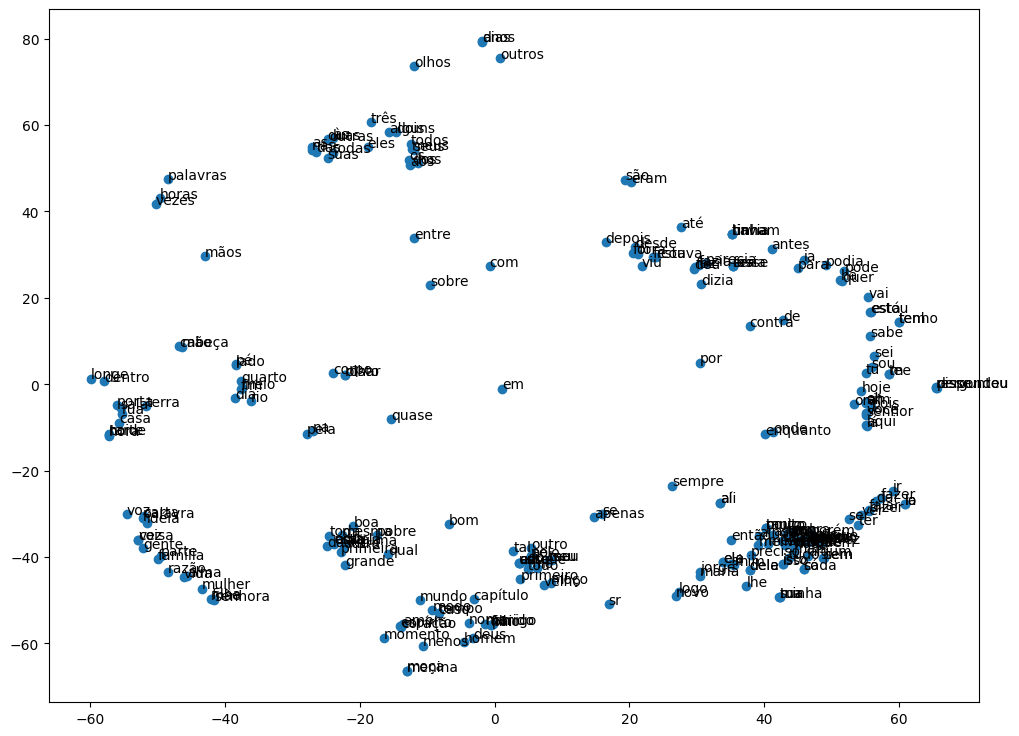

In [ ]:
m = 250
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df[:m]['x'], df[:m]['y'])
for word, pos in df[:m].iterrows():
    ax.annotate(word, pos)
plt.show()